In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('classification_data/Social_Network_Ads.csv').values
print(dataset)

[[   19 19000     0]
 [   35 20000     0]
 [   26 43000     0]
 ...
 [   50 20000     1]
 [   36 33000     0]
 [   49 36000     1]]


In [3]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)

### SVM

In [6]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear',C=1)
svm_rbf = SVC(kernel='rbf',C=1)
svm_linear.fit(X_train_sc,y_train)
svm_rbf.fit(X_train_sc,y_train)

SVC(C=1)

In [7]:
# svm_linear와 svm_rbf의 test 데이터에 대한 예측값 구하기 (predict)
# ※ 학습과정에서 scaling을 했으므로, X_test도 scaling 해야 함
X_test_sc = sc.transform(X_test)
y_pred_linear = svm_linear.predict(X_test_sc)
y_pred_rbf = svm_rbf.predict(X_test_sc)

In [8]:
# svm_linear와 svm_rbf의 test 데이터에 대한 accuracy 구하기 (accuracy_score)
from sklearn.metrics import accuracy_score
acc_linear = accuracy_score(y_test,y_pred_linear)
acc_rbf = accuracy_score(y_test,y_pred_rbf)
print('Linear SVM accuracy: ', acc_linear*100)
print('RBF SVM accuracy: ', acc_rbf*100)

Linear SVM accuracy:  90.0
RBF SVM accuracy:  94.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


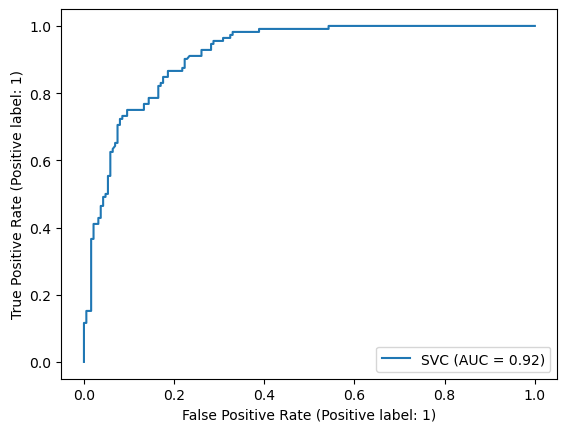

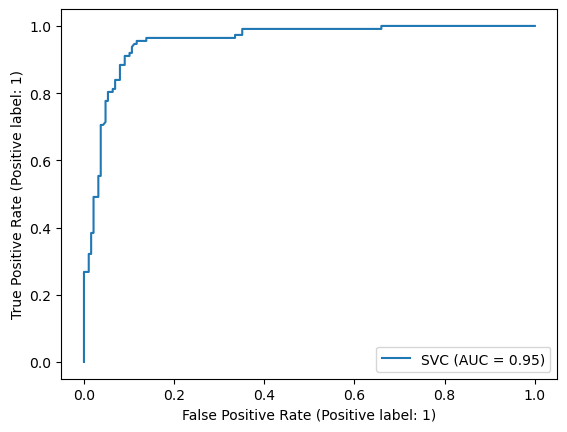

In [9]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm_linear,X_train_sc,y_train)
plot_roc_curve(svm_rbf,X_train_sc,y_train)

### 2D 시각화

In [12]:
# age와 salary의 최소/최대값
# X[:,0] -> age, X[:,1] -> salary
print(X[:,0].min(),X[:,0].max())
print(X[:,1].min(),X[:,1].max())

18 60
15000 150000


In [36]:
# age와 salary의 좌표 범위 설정
x0 = np.linspace(15,65,500)
x1 = np.linspace(10000,160000,500)

In [37]:
# meshgrid를 이용해서 좌표 확장하기
X0,X1 = np.meshgrid(x0,x1)
print(X0.shape,X1.shape)

(500, 500) (500, 500)


In [38]:
# X0와 X1을 2D array (n,1)로 변환하여 SVM model에 입력가능한 형태(2D)로 변형
X0_age = X0.reshape(-1,1)
X1_sal = X1.reshape(-1,1)
# -> 2D (n,1)로 변환

coord = np.concatenate((X0_age,X1_sal),axis=1)
# np.concatenate((a,b),axis)
# ndarray a와 b를 결합 (결합 결과의 차원은 입력과 동일함)
# axis는 결합 방향을 결정 (2D의 경우, 0=상하결합, 1=좌우결합)
print(coord.shape)
print(coord)

(250000, 2)
[[1.50000000e+01 1.00000000e+04]
 [1.51002004e+01 1.00000000e+04]
 [1.52004008e+01 1.00000000e+04]
 ...
 [6.47995992e+01 1.60000000e+05]
 [6.48997996e+01 1.60000000e+05]
 [6.50000000e+01 1.60000000e+05]]


In [39]:
# 위에서 생성한 좌표에 대한 SVM 예측값 구하기
# svm은 x를 스케일링하여 적용되었으므로
# 위에서 생성한 좌표도 스케일링되어야 함
coord_sc = sc.transform(coord)
linear_pred = svm_linear.predict(coord_sc)
rbf_pred = svm_rbf.predict(coord_sc)
print(linear_pred.shape,rbf_pred.shape)

(250000,) (250000,)


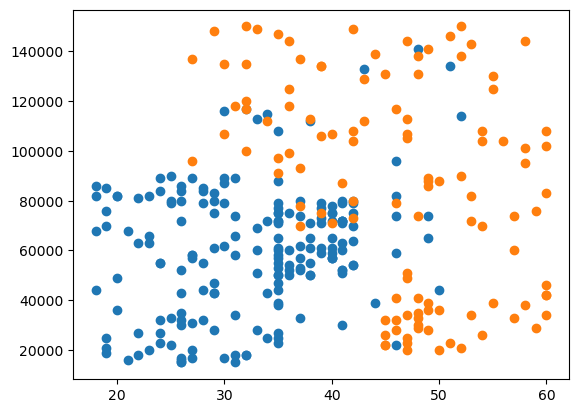

In [40]:
# 실제 y값이 0인 X와 1인 X를 분리함
X_train0 = X_train[y_train==0,:]
X_train1 = X_train[y_train==1,:]
# -> X_train0은 y가 0인 X_train, X_train1은 y가 1인 X_train
plt.scatter(X_train0[:,0],X_train0[:,1])
plt.scatter(X_train1[:,0],X_train1[:,1])

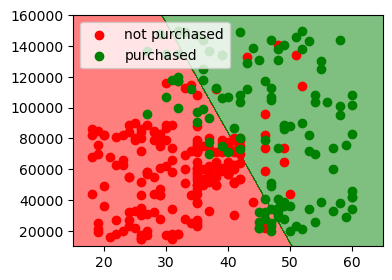

In [41]:
# 각 class의 영역에 따라 색상으로 표현 (contourf)
from matplotlib.colors import ListedColormap
# red와 green으로 구성된 colormap 생성
class_color = ListedColormap(('red','green'))
plt.figure(figsize=(4,3))
plt.contourf(X0,X1,linear_pred.reshape(X0.shape),cmap=class_color,alpha=0.5)
# linear_pred를 X0와 동일한 shape으로 변경
plt.scatter(X_train0[:,0],X_train0[:,1],color='red',label='not purchased')
plt.scatter(X_train1[:,0],X_train1[:,1],color='green',label='purchased')
plt.legend()

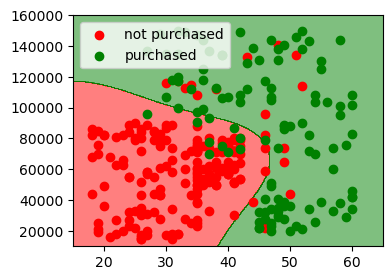

In [42]:
from matplotlib.colors import ListedColormap
class_color = ListedColormap(('red','green'))
plt.figure(figsize=(4,3))
plt.contourf(X0,X1,rbf_pred.reshape(X0.shape),cmap=class_color,alpha=0.5)
plt.scatter(X_train0[:,0],X_train0[:,1],color='red',label='not purchased')
plt.scatter(X_train1[:,0],X_train1[:,1],color='green',label='purchased')
plt.legend()